# BACE1 Drugs Discovery <br><br>

This project presents a comprehensive approach to analyzing and modeling bioactivity data with the goal of advancing drug discovery. The focus of this study is on identifying and classifying compounds based on their bioactivity profiles, specifically targeting the protein **Beta-secretase 1 (BACE1)**. This protein plays a crucial role in the development of Alzheimer's disease, making it a significant target for drug discovery efforts aimed at developing therapies for neurodegenerative diseases.

The notebook is divided into several key sections:

1. **Retrieving and Preprocessing Bioactivity Data**

  We start by retrieving bioactivity data from the ChEMBL database and preprocess it by cleaning, handling missing values, and standardizing the data. This ensures high-quality input for subsequent analyses.

2. **Exploratory Data Analysis**

  In this phase, we perform Exploratory Data Analysis (EDA) to understand the dataset's structure. Key features such as molecular weight (MW), LogP, NumHDonors, and NumHAcceptors are analyzed to evaluate their role in distinguishing between active and inactive compounds. We use the Mann-Whitney U test to assess if pIC50 values significantly differ between the two classes.

3. **Descriptor Calculation and Dataset Preparation**

  We calculate molecular descriptors with PaDEL, which are essential for model building. The dataset is then prepared for modeling, including splitting into training and testing sets.

4. **Model Building**

  We build and evaluate Random Forest models for both regression and classification tasks. Regression models predict pIC50 values, while classification models differentiate between active and inactive compounds. Techniques such as class weighting and hyperparameter tuning are employed to enhance model performance.

<br>

## **1. Retrieving and Preprocessing Bioactivity Data**


### 1.1.Introduction to ChEMBL Database:
The ChEMBL Database is a comprehensive resource that contains curated bioactivity data of millions of compounds, making it a valuable asset for drug discovery research.<br><br>

### 1.2.Installing and Importing Libraries:
First, we need to install and import the necessary libraries to retrieve data from the ChEMBL database.

In [ ]:
!pip install chembl_webresource_client




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

### 1.3 Target Protein: Beta-secretase 1 (BACE1)
In drug discovery, a target protein is a molecule (often a protein) in the body that is involved in a disease process and can be targeted by drugs to modulate the disease. We'll start by searching for a target protein relevant to our research.
<br><br>
Beta-secretase 1 (BACE1) is an enzyme critically involved in the production of amyloid-β peptides, which are major components of the plaques found in the brains of individuals with Alzheimer's disease. Inhibiting BACE1 has been a key therapeutic strategy for reducing amyloid-β levels and, consequently, potentially slowing or preventing the progression of Alzheimer's.

In [ ]:
# Initialize the target client
target = new_client.target

# Search for a target protein related to our research, for example, aromatase
target_query = target.search('Beta-secretase 1')


# Convert the search results into a DataFrame for easier analysis
targets = pd.DataFrame.from_dict(target_query)
targets



,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Beta-secretase (BACE),22.0,False,CHEMBL2111390,"[{'accession': 'Q9Y5Z0', 'component_descriptio...",PROTEIN FAMILY,9606.0
1,[],Rattus norvegicus,Beta-secretase 2,22.0,False,CHEMBL2331066,"[{'accession': 'Q6IE75', 'component_descriptio...",SINGLE PROTEIN,10116.0
2,"[{'xref_id': 'Beta-secretase_1', 'xref_name': ...",Homo sapiens,Beta-secretase 1,21.0,False,CHEMBL4822,"[{'accession': 'P56817', 'component_descriptio...",SINGLE PROTEIN,9606.0
3,"[{'xref_id': 'P56818', 'xref_name': None, 'xre...",Mus musculus,Beta-secretase 1,21.0,False,CHEMBL4593,"[{'accession': 'P56818', 'component_descriptio...",SINGLE PROTEIN,10090.0
4,[],Rattus norvegicus,Beta-secretase 1,21.0,False,CHEMBL3259473,"[{'accession': 'P56819', 'component_descriptio...",SINGLE PROTEIN,10116.0
...,...,...,...,...,...,...,...,...,...
4656,[],Mus musculus,Histone deacetylase,0.0,False,CHEMBL3832944,"[{'accession': 'Q8VH37', 'component_descriptio...",PROTEIN FAMILY,10090.0
4657,[],Homo sapiens,80S Ribosome,0.0,False,CHEMBL3987582,"[{'accession': 'P08865', 'component_descriptio...",PROTEIN NUCLEIC-ACID COMPLEX,9606.0
4658,[],Rattus norvegicus,Voltage-gated sodium channel,0.0,False,CHEMBL3988641,"[{'accession': 'O88457', 'component_descriptio...",PROTEIN FAMILY,10116.0
4659,[],Homo sapiens,DNA-PK/Ku70/Ku85,0.0,False,CHEMBL4106136,"[{'accession': 'P78527', 'component_descriptio...",PROTEIN COMPLEX,9606.0


In [ ]:
targets.shape

(4661, 9)

In [ ]:
# Select a specific target protein from the search results
selected_target = targets.target_chembl_id[2]
selected_target

'CHEMBL4822'

In [ ]:
targets.pref_name[0]

'Beta-secretase (BACE)'

### 1.4 Retrieve Bioactivity Data
In drug discovery, bioactivity data refers to experimental measurements of how compounds interact with target proteins. We'll retrieve bioactivity data for the selected target protein, focusing specifically on IC50 values in nanomolar (nM) units. IC50 is the concentration of a compound required to inhibit the target protein by 50%.

In [ ]:
# Initialize the activity client
activity = new_client.activity

# Retrieve bioactivity data for the selected target protein, filtering by IC50 values
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

# Convert the retrieved data into a DataFrame for further analysis
df = pd.DataFrame.from_dict(res)


### 1.5 Preprocess Bioactivity Data
Before we can use the bioactivity data for analysis, we need to preprocess it. This involves handling missing values and labeling compounds based on their IC50 values as active, inactive, or intermediate.

In [ ]:
df.shape

(10722, 46)

In [ ]:
# Remove rows with missing values in the standard_value and canonical_smiles columns
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
# Label compounds based on their IC50 values



<ipython-input-69-bd29025b95fd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


In [ ]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,413.0
1,None,None,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.002
2,None,None,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.46
3,None,None,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,None,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10717,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25076257,[],CHEMBL5254629,Inhibition of human BACE-1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,2.8
10718,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25076258,[],CHEMBL5254629,Inhibition of human BACE-1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,1.6
10719,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25076259,[],CHEMBL5254629,Inhibition of human BACE-1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,4.5
10720,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25076260,[],CHEMBL5254629,Inhibition of human BACE-1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,2.4


In [ ]:
len(df.canonical_smiles.unique())

7537

In [ ]:
df2_dup = df2.drop_duplicates(['canonical_smiles'])
df2_dup

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,413.0
1,None,None,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.002
2,None,None,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.46
3,None,None,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,None,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25030925,[],CHEMBL5241710,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,32.8
10714,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25030926,[],CHEMBL5241710,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,25.3
10716,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25030928,[],CHEMBL5241710,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,15.8
10719,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25076259,[],CHEMBL5254629,Inhibition of human BACE-1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,4.5


### 1.6 Classification of Compounds Based on Bioactivity<br>

In this step, we classify the compounds into three categories: **active**, **inactive**, and **intermediate** based on their bioactivity values (`standard_value`). Specifically:

- Compounds with a `standard_value` of **≥ 10000** are labeled as **inactive**.
- Compounds with a `standard_value` of **≤ 1000** are labeled as **active**.
- Compounds with `standard_value` between **1000 and 10000** are labeled as **intermediate**.

This categorization helps distinguish the potency of each compound in relation to its bioactivity. We then create a new DataFrame (`df3`) to store the compound identifiers (`molecule_chembl_id`), molecular structures (`canonical_smiles`), bioactivity classes, and their respective `standard_value`.


In [ ]:
bioactivity_class = []
for value in df2_dup.standard_value:
    if float(value) >= 10000:
        bioactivity_class.append("inactive")
    elif float(value) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")

# Combine olecule_chembl_id,canonical_smiles,standard_value and bioactivity_class into a DataFrame
df3 = pd.DataFrame({
    'molecule_chembl_id': df2_dup.molecule_chembl_id,
    'canonical_smiles': df2_dup.canonical_smiles,
    'bioactivity_class': bioactivity_class,
    'standard_value': df2_dup.standard_value
})

### 1.7 Save Preprocessed Data
Finally, we'll save the preprocessed bioactivity data to a CSV file for further analysis.

In [ ]:
# Save the preprocessed data to a CSV file
df3.to_csv('preprocessed_data1.csv', index=False)


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-09-17 00:24:38--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   160MB/s    in 0.5s    

2024-09-17 00:24:39 (160 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_10

In [ ]:
df = pd.read_csv('preprocessed_data1.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,5600.0
...,...,...,...,...
7422,CHEMBL5268805,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2cc3oc(-c4cc...,inactive,32800.0
7423,CHEMBL5288184,COc1ccc(-c2cc3cc4c(=O)c(/C=N/Nc5ccc(C(F)(F)F)c...,inactive,25300.0
7424,CHEMBL5273380,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2c1ccc1oc(-c...,inactive,15800.0
7425,CHEMBL583912,Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)C2,intermediate,4500.0


## 1.8.Data Cleaning
We clean the data by extracting the longest canonical smiles.

The process of extracting the longest canonical SMILES (Simplified Molecular Input Line Entry System) involves selecting the most representative SMILES string for each compound in the dataset. Here's why we perform this step:

  * **Canonicalization**: Canonical SMILES represent a unique and standardized representation of chemical structures. Canonicalization ensures that chemically identical compounds have the same SMILES representation, facilitating comparison and analysis.


  * **Consistency**: Compounds may have multiple SMILES representations due to different tautomeric forms, stereochemistry, or protonation states. By selecting the longest canonical SMILES, we aim to choose a single, consistent representation for each compound.


  * **Simplicity**: Longer SMILES strings typically provide more detailed structural information, including stereochemistry and connectivity, making them preferable for analysis.


  * **Data Quality**: Using canonical SMILES helps improve data quality by reducing redundancy and ensuring consistency across the dataset.






In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles


,molecule_chembl_id,bioactivity_class,standard_value,canonical_smiles
0,CHEMBL406146,active,413.0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...
1,CHEMBL78946,active,2.0,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...
2,CHEMBL324109,active,460.0,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...
3,CHEMBL114147,intermediate,9000.0,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...
4,CHEMBL419949,intermediate,5600.0,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...
...,...,...,...,...
7422,CHEMBL5268805,inactive,32800.0,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2cc3oc(-c4cc...
7423,CHEMBL5288184,inactive,25300.0,COc1ccc(-c2cc3cc4c(=O)c(/C=N/Nc5ccc(C(F)(F)F)c...
7424,CHEMBL5273380,inactive,15800.0,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2c1ccc1oc(-c...
7425,CHEMBL583912,intermediate,4500.0,Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)C2


## 1.9.Lipinski Descriptors Calculation

This section of code calculates the **Lipinski descriptors** for each molecule in the dataset. The Lipinski descriptors are important in determining the drug-likeness of a compound. These descriptors include:

- **Molecular Weight (MW)**: The mass of the compound's molecule.
- **LogP**: A measure of the compound's hydrophobicity.
- **Number of Hydrogen Donors (NumHDonors)**: The count of hydrogen atoms available for forming hydrogen bonds.
- **Number of Hydrogen Acceptors (NumHAcceptors)**: The count of atoms that can accept hydrogen bonds.

The `lipinski` function takes in a list of SMILES strings representing the molecular structures and calculates the above descriptors using RDKit. The descriptors for all molecules are stored in a DataFrame.

Finally, we concatenate this DataFrame of Lipinski descriptors with the original dataset to create a combined dataset (`df_combined`) containing both the original data and the newly calculated descriptors. This step is crucial for analyzing the drug-likeness of the compounds.


In [ ]:

!pip install rdkit


In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        try:
            mol = Chem.MolFromSmiles(elem)
            if mol is not None:
                moldata.append(mol)
        except:
            pass

    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if (i == 0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors


In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,999.085,-1.4355,13.0,13.0
1,893.005,-1.7361,12.0,12.0
2,751.988,2.3535,8.0,9.0
3,737.895,1.9626,8.0,8.0
4,828.020,3.5739,8.0,8.0
...,...,...,...,...
7422,482.845,7.3244,1.0,5.0
7423,478.426,6.6796,1.0,6.0
7424,466.390,6.8101,1.0,5.0
7425,290.271,1.5461,5.0,6.0


We combine the calculated Lipinski descriptors with our original data.

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)




### 1.10.Converting IC50 Values to pIC50

This code cell converts IC50 values, which are originally in nanomolar (nM), into pIC50 values. The pIC50 value is the negative log of the IC50 value in molar:

*`pIC50 = -log_10(IC50 in molar)`*



In drug discovery, IC50 values indicate how much of a drug is needed to inhibit a target by 50%. However, for many modeling techniques, including QSAR (Quantitative Structure-Activity Relationship), it's more useful to work with pIC50 values.

The pIC50 value provides a more straightforward way to compare drug potency:
- **Higher Values**: Indicate higher potency (more effective drugs).
- **Lower Values**: Indicate lower potency.

This function ensures that our data is in the pIC50 format, which helps in building more accurate and interpretable models to predict drug effectiveness.


In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb
def pIC50(input):
    pIC50 = []
    epsilon = 1e-10  # Small positive value to avoid log(0)

    for i in input['standard_value_norm']:
        molar = max(i*(10**-9), epsilon)  # Ensure molar is not zero
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x



In [ ]:
df_combined.standard_value.describe()

,standard_value
count,7.427000e+03
mean,4.270048e+04
std,1.100205e+06
min,2.000000e-04
25%,2.845000e+01
50%,2.600000e+02
75%,3.350000e+03
max,8.600000e+07


### 1.11.Normalizing IC50 Values

The `norm_value` function adjusts the IC50 values to cap them at a maximum of 100,000,000 (100 million) to handle extreme outliers. Here's how it works:

- **Loop Through Values**: Each value in the `standard_value` column is checked.
  - If the value is greater than 100 million, it is capped at 100 million to avoid extreme values.
- **Create a New Column**: The adjusted values are stored in a new column called `standard_value_norm`, and the original `standard_value` column is removed.

This normalization ensures that very large IC50 values don’t distort the data and helps improve model accuracy in drug discovery tasks.


In [ ]:
def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
    return x


In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5600.0
...,...,...,...,...,...,...,...,...
7422,CHEMBL5268805,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2cc3oc(-c4cc...,inactive,482.845,7.3244,1.0,5.0,32800.0
7423,CHEMBL5288184,COc1ccc(-c2cc3cc4c(=O)c(/C=N/Nc5ccc(C(F)(F)F)c...,inactive,478.426,6.6796,1.0,6.0,25300.0
7424,CHEMBL5273380,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2c1ccc1oc(-c...,inactive,466.390,6.8101,1.0,5.0,15800.0
7425,CHEMBL583912,Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)C2,intermediate,290.271,1.5461,5.0,6.0,4500.0


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,7.427000e+03
mean,4.270048e+04
std,1.100205e+06
min,2.000000e-04
25%,2.845000e+01
50%,2.600000e+02
75%,3.350000e+03
max,8.600000e+07


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...
7422,CHEMBL5268805,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2cc3oc(-c4cc...,inactive,482.845,7.3244,1.0,5.0,4.484126
7423,CHEMBL5288184,COc1ccc(-c2cc3cc4c(=O)c(/C=N/Nc5ccc(C(F)(F)F)c...,inactive,478.426,6.6796,1.0,6.0,4.596879
7424,CHEMBL5273380,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2c1ccc1oc(-c...,inactive,466.390,6.8101,1.0,5.0,4.801343
7425,CHEMBL583912,Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)C2,intermediate,290.271,1.5461,5.0,6.0,5.346787


In [ ]:
df_final.pIC50.describe()

,pIC50
count,7427.000000
mean,6.477716
std,1.396046
min,1.065502
25%,5.474955
50%,6.585027
75%,7.545918
max,10.000000


## **2.Exploratory Data Analysis**
Now, we perform EDA to analyze the chemical space of our data.

### 2.1.Frequency Plot of Bioactivity Classes

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [ ]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
5,CHEMBL116826,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,inactive,767.987,1.3690,8.0,9.0,4.468521
6,CHEMBL143239,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,active,717.722,4.3196,7.0,7.0,7.698970
...,...,...,...,...,...,...,...,...
7420,CHEMBL5278429,COc1ccc(-c2oc3cc(OC)c(I)cc3c(=O)c2O)cc1,active,424.190,3.7874,1.0,5.0,7.648977
7421,CHEMBL5288752,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2cc3oc(-c4cc...,inactive,466.390,6.8101,1.0,5.0,4.761954
7422,CHEMBL5268805,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2cc3oc(-c4cc...,inactive,482.845,7.3244,1.0,5.0,4.484126
7423,CHEMBL5288184,COc1ccc(-c2cc3cc4c(=O)c(/C=N/Nc5ccc(C(F)(F)F)c...,inactive,478.426,6.6796,1.0,6.0,4.596879


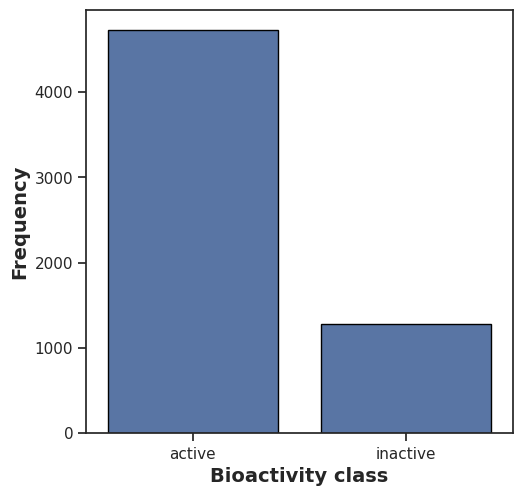

In [ ]:
# Frequency plot of Bioactivity Classes
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('plot_bioactivity_class.pdf')


### 2.2.Scatter plot of MW versus LogP

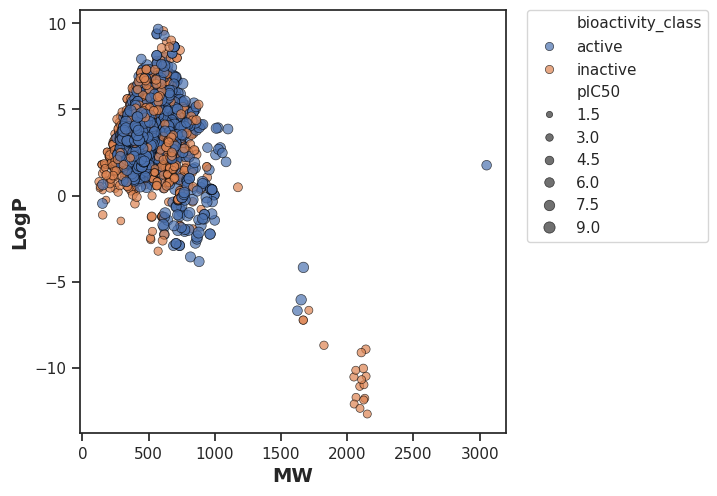

In [ ]:
plt.figure(figsize=(5.5, 5.5))

# Check for NaN and infinite values in 'MW' and 'LogP' columns
valid_data = df_2class[np.isfinite(df_2class['MW']) & np.isfinite(df_2class['LogP'])]

# Check if there are ANY data points (including potentially invalid ones)
if len(df_2class) > 0:
  # Plot only the valid data (if any)
  sns.scatterplot(x='MW', y='LogP', data=valid_data, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

  plt.xlabel('MW', fontsize=14, fontweight='bold')
  plt.ylabel('LogP', fontsize=14, fontweight='bold')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

  try:
      # Attempt to save the plot. If there are still invalid values, the exception will be caught.
      plt.savefig('plot_MW_vs_LogP.pdf')
  except ValueError as e:
      if "Can only output finite numbers in PDF" in str(e):
          print("Warning: Encountered invalid values (NaN or inf) in data. Plot might not be accurate. Consider filtering data before plotting.")
      else:
          # Handle other potential ValueErrors differently
          raise e  # Re-raise the exception for unexpected errors

else:
  print("Error: No valid data points for plotting.")


**Observation**

Most active and inactive compounds in this dataset exhibit similar MW and LogP ranges, with no clear distinction between classes based solely on these two properties. However, outliers and clusters may provide insights into specific molecular characteristics that influence bioactivity. The distribution suggests a balanced mix of active and inactive compounds across these molecular descriptors.

### 2.3.Box plots

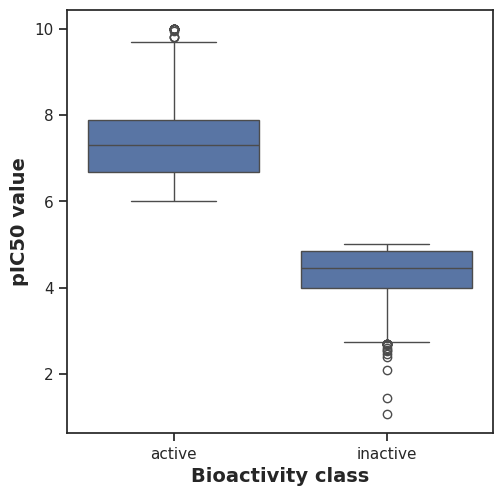

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_ic50.pdf')

**Observation**

The box plot effectively demonstrates the difference in bioactivity between the two classes, with active compounds having a substantially higher range of pIC50 values than inactive compounds. This distinction further validates the classification based on pIC50 values.

### 2.4.Statistical analysis: Mann-Whitney U Test for pIC50


The `mannwhitney` function performs a Mann-Whitney U test to assess the statistical significance of differences between the distributions of a specified molecular descriptor in two bioactivity classes (active and inactive). This test is a non-parametric method used to determine whether there is a significant difference between two independent samples.


In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,6035480.0,0.0,0.05,Different distribution (reject H0)



The Mann-Whitney U test was performed to compare the distribution of the pIC50 descriptor between active and inactive compounds. Here’s a breakdown of the results:
<br>

**Statistics**: The U statistic value is 6035480.0, which quantifies the difference between the two distributions.

**p-value**: The p-value is 0.0, which is less than the significance level (alpha) of 0.05.

**alpha**: The significance level set for the test is 0.05.


**Interpretation**: Since the p-value is less than alpha, we reject the null hypothesis (H0). This means there is a statistically significant difference between the distributions of the pIC50 values for active and inactive compounds.

<br>

**Conclusion**
The results indicate that the pIC50 descriptor significantly differentiates between active and inactive compounds. This suggests that pIC50 is a relevant feature for distinguishing between these two classes, making it an important descriptor in our analysis.

### 2.5.MW

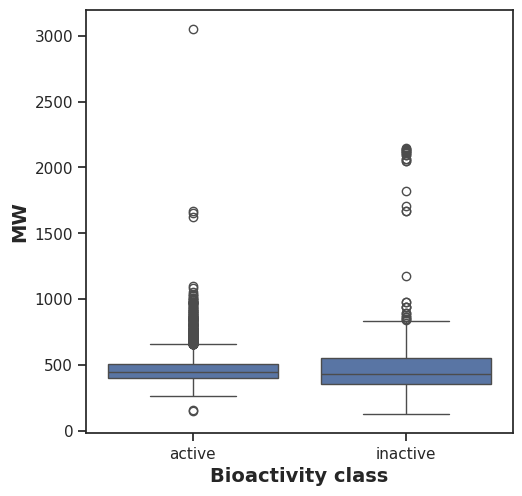

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

**Observation**


The box plot suggests that molecular weight (MW) may not be a strong distinguishing factor between active and inactive compounds, as their distributions are highly similar. Both categories show a majority of compounds clustered around the same median with outliers stretching into the higher MW range.

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3346349.0,2.253448e-09,0.05,Different distribution (reject H0)


### 2.6.LogP

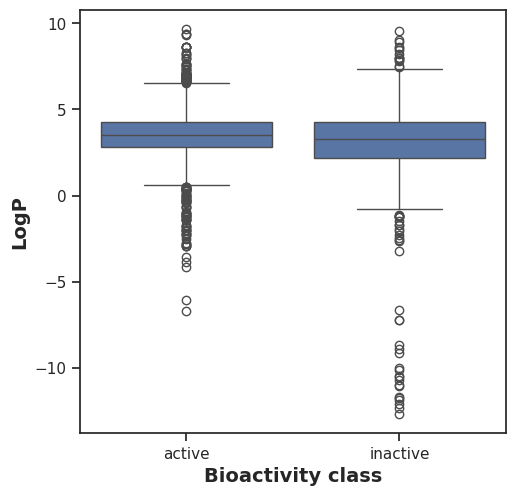

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Observation**

the LogP *(which represent the partition coefficient of a molecule, indicating its hydrophobicity)* values for the active and inactive bioactivity classes do not exhibit a substantial visual difference in this plot, suggesting LogP may not be a strong differentiating factor between the two classes.

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3370557.0,1.373400e-10,0.05,Different distribution (reject H0)


### 2.7.NumHDonors

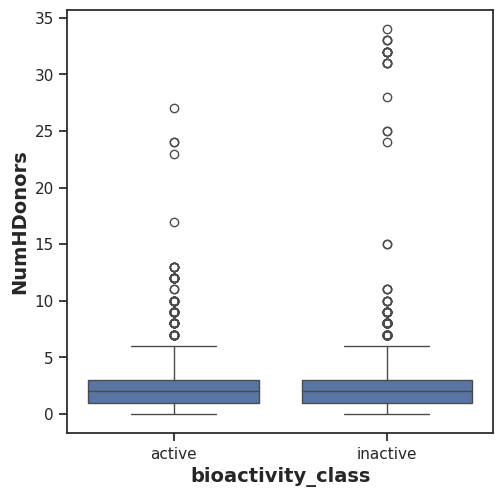

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('bioactivity_class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Observation**

the number of hydrogen bond donors (NumHDonors) is distributed similarly across both bioactivity classes, suggesting that this feature might not strongly differentiate between active and inactive compounds. However, both classes exhibit a few high outliers.

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2761499.0,0.000001,0.05,Different distribution (reject H0)


### 2.8.NumHAcceptors

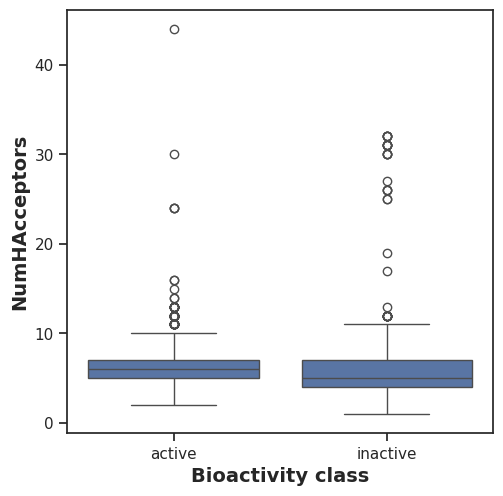

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

 **Observation**

  Similar to previous features (LogP and NumHDonors), NumHAcceptors (number of hydrogen bond acceptors)  does not show a substantial difference between active and inactive classes, although both have notable outliers. This suggests that NumHAcceptors might not be a strong distinguishing feature for bioactivity classification.

## 2.9.Interpretation of Statistical Results

**pIC50 values**
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

**Lipinski's descriptors**
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

In [ ]:
# Save the preprocessed data to a CSV file
df_2class.to_csv('preprocessed_data2.csv', index=False)

## **3 .Descriptor Calculation and Dataset Preparation**

 * Calculating molecular descriptors - quantitative representations of a molecule's properties.
 * Preparing the dataset for model building in Part 4.

In [1]:
import pandas as pd
df4=pd.read_csv('preprocessed_data2.csv')

In [2]:
df4

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
3,CHEMBL116826,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,inactive,767.987,1.3690,8.0,9.0,4.468521
4,CHEMBL143239,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,active,717.722,4.3196,7.0,7.0,7.698970
...,...,...,...,...,...,...,...,...
6001,CHEMBL5278429,COc1ccc(-c2oc3cc(OC)c(I)cc3c(=O)c2O)cc1,active,424.190,3.7874,1.0,5.0,7.648977
6002,CHEMBL5288752,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2cc3oc(-c4cc...,inactive,466.390,6.8101,1.0,5.0,4.761954
6003,CHEMBL5268805,O=c1c(/C=N/Nc2ccc(C(F)(F)F)cc2)coc2cc3oc(-c4cc...,inactive,482.845,7.3244,1.0,5.0,4.484126
6004,CHEMBL5288184,COc1ccc(-c2cc3cc4c(=O)c(/C=N/Nc5ccc(C(F)(F)F)c...,inactive,478.426,6.6796,1.0,6.0,4.596879


###  3.1.Download PaDEL-Descriptor

We'll use PaDEL to calculate molecular descriptors for our compounds. Here, we download the necessary files:

* padel.zip: Contains the PaDEL software
* padel.sh: Script to run PaDEL

In [3]:
! pip install padelpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 88.8 MB/s eta 0:00:00


In [4]:
selection = ['canonical_smiles','molecule_chembl_id']
df4_selection = df4['canonical_smiles']
df4_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [5]:
!pip install wget  # Downloading library
import zipfile  # Unzipping library


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=6f0b8929eed28ea6efe6f86048c71141b41961e63ee195f0be588de5ced00e59
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [6]:
! wget https://raw.githubusercontent.com/radiadjebrouni/AIxMedecine/main/Drug_Discovery/padel.zip
! wget https://raw.githubusercontent.com/radiadjebrouni/AIxMedecine/main/Drug_Discovery/padel.sh

--2024-09-17 21:42:45--  https://raw.githubusercontent.com/radiadjebrouni/AIxMedecine/main/Drug_Discovery/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  54.5MB/s    in 0.5s    

2024-09-17 21:42:47 (54.5 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-09-17 21:42:47--  https://raw.githubusercontent.com/radiadjebrouni/AIxMedecine/main/Drug_Discovery/padel.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

In [7]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [8]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [9]:
! bash padel.sh

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Processing AUTOGEN_molecule_1007 in molecule.smi (1007/6006). Average speed: 0.28 s/mol.
Processing AUTOGEN_molecule_1010 in molecule.smi (1010/6006). Average speed: 0.28 s/mol.
Processing AUTOGEN_molecule_1009 in molecule.smi (1009/6006). Average speed: 0.28 s/mol.
Processing AUTOGEN_molecule_1011 in molecule.smi (1011/6006). Average speed: 0.28 s/mol.
Processing AUTOGEN_molecule_1012 in molecule.smi (1012/6006). Average speed: 0.28 s/mol.
Processing AUTOGEN_molecule_1013 in molecule.smi (1013/6006). Average speed: 0.28 s/mol.
Processing AUTOGEN_molecule_1014 in molecule.smi (1014/6006). Average speed: 0.28 s/mol.
Processing AUTOGEN_molecule_1015 in molecule.smi (1015/6006). Average speed: 0.28 s/mol.
Processing AUTOGEN_molecule_1016 in molecule.smi (1016/6006). Average speed: 0.28 s/mol.
Processing AUTOGEN_molecule_1017 in molecule.smi (1017/6006). Average speed: 0.28 s/mol.
Processing AUTOGEN_molecule_1018

In [10]:
df4_X = pd.read_csv('descriptors_output.csv')
df4_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_molecule_2,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_molecule_1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_molecule_3,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUTOGEN_molecule_4,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_molecule_5,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,AUTOGEN_molecule_6002,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6002,AUTOGEN_molecule_6003,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6003,AUTOGEN_molecule_6004,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6004,AUTOGEN_molecule_6005,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df4_X = df4_X.drop(columns=['Name'])
df4_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6002,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6003,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6004,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df4_Y = df4['bioactivity_class']
df4_Y_reg=df4['pIC50']

In [13]:
dataset4 = pd.concat([df4_X,df4_Y], axis=1)
dataset5= pd.concat([df4_X,df4_Y_reg], axis=1)

In [14]:
dataset4.to_csv('preprocessed_data3_class.csv', index=False)
dataset5.to_csv('preprocessed_data3_reg.csv', index=False)


#**4- Model building**

## 4.1.Regression Model with Random Forest

**Load the Dataset**

In [15]:
import pandas as pd
df5 = pd.read_csv('preprocessed_data3_reg.csv')
df6 = pd.read_csv('preprocessed_data3_class.csv')

**Define Input and Output Features**

We identify our input features (X) and output variable (Y). The dataset contains 881 input features representing molecular fingerprints and 1 output variable (pIC50 values).

Input features shape after variance thresholding: (6006, 162)
Training set shape: (4804, 162) (4804,)
Testing set shape: (1202, 162) (1202,)
R-squared on test set: 0.5614133935469968


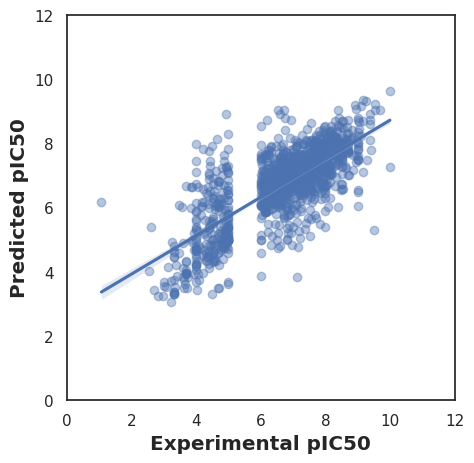

In [26]:

import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix

X = df5.drop('pIC50', axis=1)
Y = df5['pIC50']

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

print("Input features shape after variance thresholding:", X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Evaluate the model
r2 = model.score(X_test, Y_test)
print("R-squared on test set:", r2)

# Make predictions
Y_pred = model.predict(X_test)

sns.set(color_codes=True)
sns.set_style("white")

plt.figure(figsize=(5, 5))
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
plt.show()


<br> <br>
### 4.2.Random Forest Classification with Class Weights for Imbalanced Bioactivity Data

The code trains a **Random Forest Classifier** to predict bioactivity while handling class imbalance by applying **class weights**. Since the dataset has more active compounds than active ones, the model might become biased towards predicting active compounds. By applying **class weights**, we help the model focus more on predicting the minority class (active compounds), which is important for drug discovery.



  **Variance Threshold for Feature Selection**:
   - We apply a **Variance Threshold** to remove features with low variance, which helps improve model performance by reducing unnecessary features.


  **Handling Class Imbalance**:
   - Since the classes are imbalanced (more inactive than active compounds), we calculate **class weights**. This gives more importance to the minority class (active compounds) during training.

**Building the Model**:
   - We use a **Random Forest Classifier** with 100 trees, and include the calculated class weights. The model is trained on the training data.






(6006, 881)
(6006,)
Classification Report:
               precision    recall  f1-score   support

      active       0.91      0.95      0.93       923
    Inactive       0.80      0.70      0.74       279

    accuracy                           0.89      1202
   macro avg       0.86      0.82      0.84      1202
weighted avg       0.89      0.89      0.89      1202

Confusion Matrix:
 [[875  48]
 [ 85 194]]


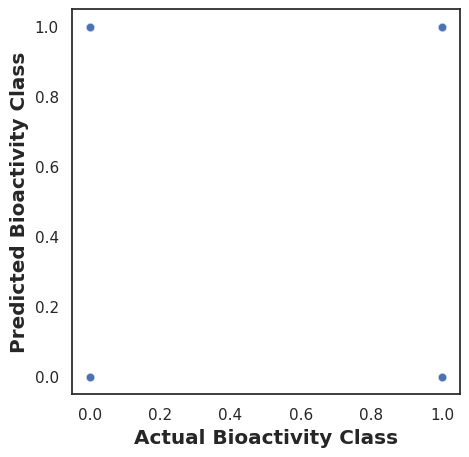

In [24]:



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define Input and Output Features
X = df6.drop('bioactivity_class', axis=1)
Y = df6['bioactivity_class']

print(X.shape)
print(Y.shape)
# Convert categorical labels to numeric
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Apply Variance Threshold
selection = VarianceThreshold(threshold=(0.1 * (1 - 0.1)))
X = selection.fit_transform(X)

# Split the Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=Y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build the Classification Model using Random Forest with class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)
model.fit(X_train, Y_train)

# Make Predictions
Y_pred = model.predict(X_test)

class_mapping = {0: 'active', 1: 'Inactive'}
# Evaluate the Model
print("Classification Report:\n", classification_report(Y_test, Y_pred, target_names=[class_mapping[i] for i in np.unique(Y_test)]))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


# Visualize the Results
sns.set(color_codes=True)
sns.set_style("white")

plt.figure(figsize=(5, 5))
ax = sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.4)
ax.set_xlabel('Actual Bioactivity Class', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Bioactivity Class', fontsize='large', fontweight='bold')
plt.show()


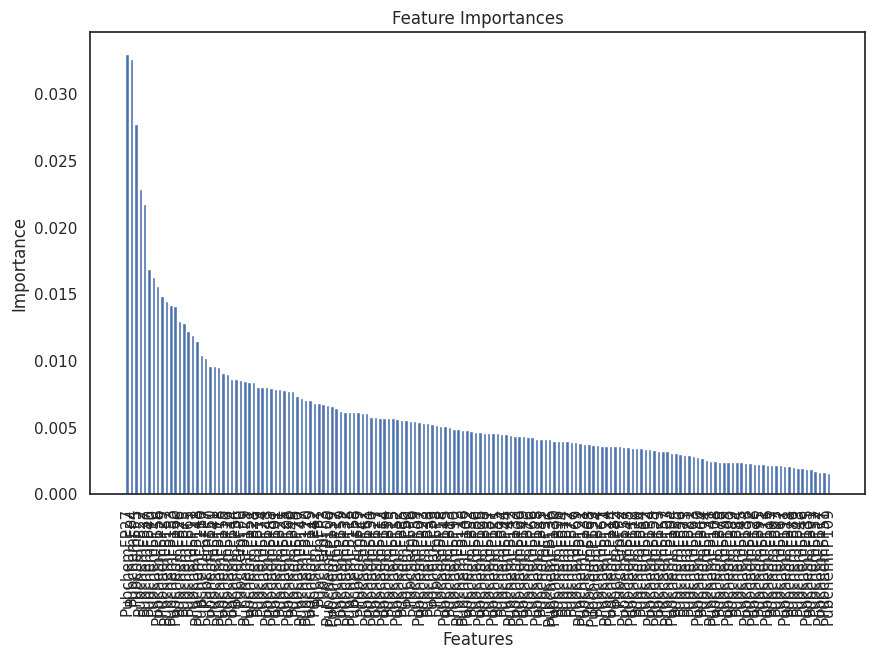

In [19]:
import matplotlib.pyplot as plt

# Plot feature importances
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), np.array(df6.columns[:-1])[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [21]:
# Select top 10 features
top_n = 10
top_idx = sorted_idx[:top_n]
# Get feature names from DataFrame
feature_names = np.array(df6.columns[:-1])  # Exclude the target column
top_feature_names = feature_names[top_idx]
top_feature_importances = feature_importances[top_idx]

# Print top 10 features and their importance
print("Top 10 features:")
for i in range(top_n):
    print(f'{top_feature_names[i]}: {top_feature_importances[i]:.4f}')

Top 10 features:
PubchemFP27: 0.0330
PubchemFP4: 0.0327
PubchemFP5: 0.0278
PubchemFP22: 0.0229
PubchemFP37: 0.0217
PubchemFP40: 0.0169
PubchemFP10: 0.0163
PubchemFP156: 0.0156
PubchemFP29: 0.0149
PubchemFP157: 0.0145


### 4.3.Hyperparameter tuning and Cross-Validation for Model Evaluation

To optimize the performance of our Random Forest model, we use `GridSearchCV` to find the best hyperparameters. We define a grid of potential values for hyperparameters such as `n_estimators`, `max_depth`, and `min_samples_split`. `GridSearchCV` performs an exhaustive search over these hyperparameters using cross-validation to evaluate each combination.

<br>
After tuning the hyperparameters, we evaluate the optimized model using cross-validation. This process splits the training data into multiple folds, trains the model on some of these folds, and tests it on the remaining fold to assess its performance. This provides a more robust estimate of the model’s performance and helps avoid overfitting.


In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Cross-validation with the best model
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_train, Y_train, cv=5, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean()}')
print(f'Standard deviation: {cv_scores.std()}')


Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Best cross-validation score:  0.9032058619493583
Cross-validation accuracy scores: [0.90218522 0.90218522 0.90530697 0.90218522 0.90416667]
Mean accuracy: 0.9032058619493583
Standard deviation: 0.0013009931514598265


In [27]:
"""import joblib

# Save the regression model
joblib.dump(model, 'random_forest_regression_model.pkl')

# Save the classification model
joblib.dump(best_model, 'random_forest_classification_model.pkl')"""


['random_forest_classification_model.pkl']


### **Results**
Initially, a regression model was used to predict pIC50 values, providing detailed quantitative measures of compound potency. However, this approach presented challenges, such as determining an arbitrary threshold for activity and handling class imbalance. To address these issues, we used a classification model, which categorizes compounds as "Active" or "Inactive." This shift simplified decision-making, improved handling of data imbalance through techniques like class weighting, and offered more actionable insights for prioritizing compounds in the drug discovery process. Overall, the classification model enhanced predictive accuracy and efficiency in identifying promising candidates.

<br>

The classification model demonstrates high accuracy with minimal variance across cross-validation folds, indicating reliable performance and good generalization ability.